## IPL SCORE PREDICTION using Linear Regression

This project is based on sports analytics

In [160]:
import pandas as pd

In [161]:
df=pd.read_csv("ipl.csv")

In [162]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [163]:
df.shape

(76014, 15)

In [164]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [165]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [166]:
df.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [167]:
#remove non existing teams
existing_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']
df = df[(df['bat_team'].isin(existing_teams)) & (df['bowl_team'].isin(existing_teams))]

In [168]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [169]:
#there are 8 existing teams
df.bat_team.nunique()

8

In [170]:
#drop unwanted columns
unwanted_columns=['mid','batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=unwanted_columns,axis=1,inplace=True)

In [171]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [172]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [173]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [174]:
df.shape

(40108, 10)

In [175]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [176]:
#unique venues
df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [177]:
#Total unique venues
df.venue.nunique()

31

In [178]:
#drop overseas venue and consider all indian venues
#This is done because ipl is usually ipl is held at indian venues
indian_venues=['M Chinnaswamy Stadium','Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla','Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens','Dr DY Patil Sports Academy','Brabourne Stadium','Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium','Subrata Roy Sahara Stadium','Rajiv Gandhi International Stadium, Uppal','Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex','Barabati Stadium', 'Maharashtra Cricket Association Stadium','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali','Holkar Cricket Stadium']
print(len(indian_venues))
df = df[(df['venue'].isin(indian_venues))]

20


In [179]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [180]:
#perform one-hot-encoding on categorical data
final_df = pd.get_dummies(data=df, columns=['venue','bat_team', 'bowl_team'])

In [181]:
final_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Dr DY Patil Sports Academy,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [182]:
final_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'venue_Barabati Stadium', 'venue_Brabourne Stadium',
       'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Eden Gardens', 'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera', 'venue_Sawai Mansingh Stadium',
       'venue_Shaheed Veer Narayan Singh International Stadium',
       'venue_Subrata Roy Sahara Stadium', 'venue_Wankhede Stadium',
      

In [183]:
print(len(final_df.columns))

43


In [184]:
#rearranging columns based on dependent and independent features
final_df=final_df[['date','venue_Barabati Stadium', 'venue_Brabourne Stadium','venue_Dr DY Patil Sports Academy','venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium','venue_Eden Gardens', 'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera', 'venue_Sawai Mansingh Stadium',
       'venue_Shaheed Veer Narayan Singh International Stadium',
       'venue_Subrata Roy Sahara Stadium', 'venue_Wankhede Stadium',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','total']]

In [200]:
final_df.head()

,date,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,venue_Holkar Cricket Stadium,venue_JSCA International Stadium Complex,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
33,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
34,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
35,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
36,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222


In [186]:
print(len(final_df.columns))

43


In [187]:
# Splitting the data into train and test set based on year since it is time series dataset
X_train = final_df.drop(labels='total', axis=1)[final_df['date'].dt.year <= 2016]
X_test = final_df.drop(labels='total', axis=1)[final_df['date'].dt.year >= 2017]

In [188]:
y_train = final_df[final_df['date'].dt.year <= 2016]['total'].values
y_test = final_df[final_df['date'].dt.year >= 2017]['total'].values

In [189]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [197]:
#Model Building
#Linear Regression Technique
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
prediction=linear.predict(X_test)

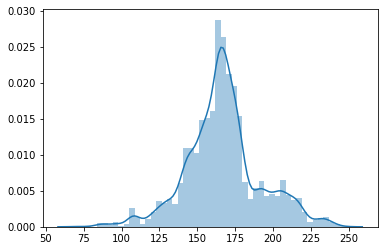

In [201]:
import seaborn as sns
sns.distplot(prediction)

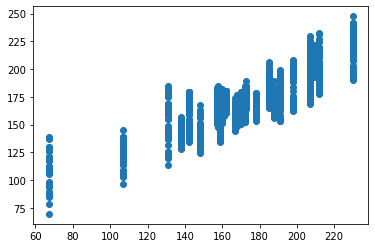

In [202]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)

In [206]:
from sklearn import metrics
import numpy as np

In [207]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.251339864814176
MSE: 266.25420940218277
RMSE: 16.317297858474692


In [208]:
import pickle
# open a file, where you ant to store the data
file = open('Ipl_lr_model.pkl', 'wb')

# dump information to that file
pickle.dump(linear, file)

### Conclusion

1. Since it is a regression problem, I have used Linear Regression Technique.
2. We can even use ridge or lasso regression method however there was not much significant difference between the performance metric results between them.
3. This project was build to understand linear regression technique.